<a href="https://colab.research.google.com/github/harsh31415926/Deep-Learning/blob/main/YT6_CNN_image_classification_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train , y_train) , (X_test , y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 37s 0us/step


(50000, 32, 32, 3)

In [3]:
y_train = y_train.reshape(-1,)
y_train

classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [4]:
def plot_sample(X,y,index):
  plt.figure(figsize=(3,3))
  plt.imshow(X[index])
  plt.xlabel(classes[y[index]])

<Figure size 300x300 with 0 Axes>

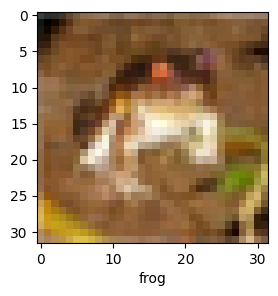

<Figure size 300x300 with 0 Axes>

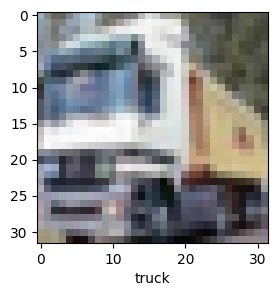

<Figure size 300x300 with 0 Axes>

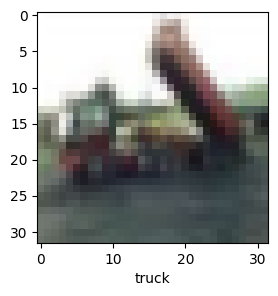

<Figure size 300x300 with 0 Axes>

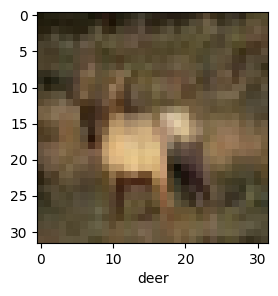

<Figure size 300x300 with 0 Axes>

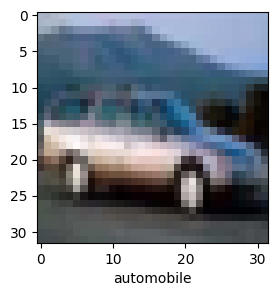

<Figure size 300x300 with 0 Axes>

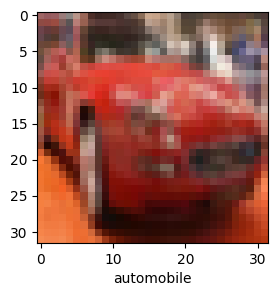

<Figure size 300x300 with 0 Axes>

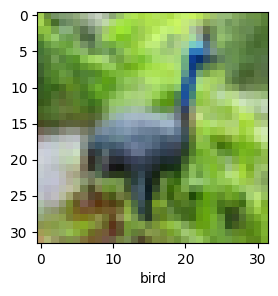

<Figure size 300x300 with 0 Axes>

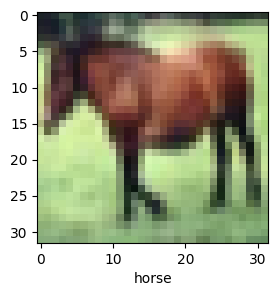

<Figure size 300x300 with 0 Axes>

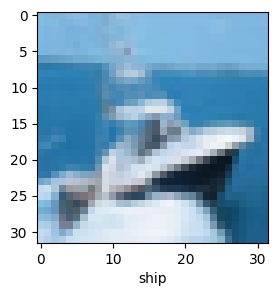

<Figure size 300x300 with 0 Axes>

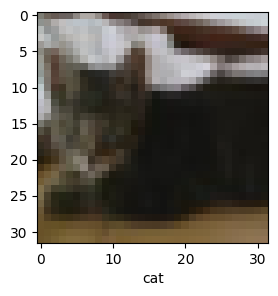

In [5]:
for i in range(10):
  plt.figure(figsize=(3,3))
  plot_sample(X_train , y_train , i)

In [6]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
# First we will try to train with ANN (Artificial Neural Network)

ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3050 - loss: 1.9353
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4195 - loss: 1.6438
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4496 - loss: 1.5596
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4774 - loss: 1.4843
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4932 - loss: 1.4352


In [8]:
ann.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4713 - loss: 1.4959


[1.5008128881454468, 0.4650000035762787]

In [9]:
from sklearn.metrics import classification_report , confusion_matrix

y_pred = ann.predict(X_test)
y_pred_class = [np.argmax(element) for element in y_pred]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [10]:
print(classification_report(y_test ,y_pred_class ))

              precision    recall  f1-score   support

           0       0.46      0.54      0.50      1000
           1       0.63      0.53      0.57      1000
           2       0.46      0.12      0.19      1000
           3       0.35      0.34      0.35      1000
           4       0.42      0.46      0.44      1000
           5       0.49      0.22      0.31      1000
           6       0.44      0.66      0.53      1000
           7       0.63      0.45      0.52      1000
           8       0.41      0.80      0.54      1000
           9       0.49      0.54      0.51      1000

    accuracy                           0.47     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.47      0.45     10000



# Using CNN

We will use CNN now to implement the same thing

In [11]:
cnn = models.Sequential([
        #CNN
        layers.Conv2D(filters = 32 , kernel_size=(3,3) , activation='relu' , input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),

        layers.Conv2D(filters = 32 , kernel_size=(3,3) , activation='relu'),
        layers.MaxPooling2D((2,2)),

        #Dense
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn.compile(optimizer = 'adam' ,
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])

In [16]:
cnn.fit(X_train , y_train , epochs = 10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.3609 - loss: 1.7471
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5671 - loss: 1.2278
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6213 - loss: 1.0768
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6471 - loss: 0.9981
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6694 - loss: 0.9372
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6926 - loss: 0.8753
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7069 - loss: 0.8354
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7210 - loss: 0.7886
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7329 - loss: 0.7534
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7496 - loss: 0.7257


In [18]:
cnn.evaluate(X_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6587 - loss: 1.0381


[1.0527095794677734, 0.6550999879837036]

In [21]:
y_pred = cnn.predict(X_test)
y_pred = [np.argmax(element) for element in y_pred]

y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


[np.int64(3),
 np.int64(8),
 np.int64(8),
 np.int64(8),
 np.int64(6),
 np.int64(6),
 np.int64(1),
 np.int64(6),
 np.int64(3),
 np.int64(1),
 np.int64(4),
 np.int64(9),
 np.int64(5),
 np.int64(7),
 np.int64(9),
 np.int64(8),
 np.int64(5),
 np.int64(3),
 np.int64(8),
 np.int64(6),
 np.int64(7),
 np.int64(0),
 np.int64(0),
 np.int64(9),
 np.int64(4),
 np.int64(2),
 np.int64(4),
 np.int64(0),
 np.int64(9),
 np.int64(6),
 np.int64(3),
 np.int64(5),
 np.int64(4),
 np.int64(5),
 np.int64(9),
 np.int64(6),
 np.int64(7),
 np.int64(9),
 np.int64(9),
 np.int64(5),
 np.int64(9),
 np.int64(6),
 np.int64(3),
 np.int64(6),
 np.int64(0),
 np.int64(9),
 np.int64(7),
 np.int64(7),
 np.int64(7),
 np.int64(4),
 np.int64(9),
 np.int64(0),
 np.int64(6),
 np.int64(6),
 np.int64(8),
 np.int64(8),
 np.int64(7),
 np.int64(8),
 np.int64(5),
 np.int64(5),
 np.int64(7),
 np.int64(5),
 np.int64(6),
 np.int64(1),
 np.int64(6),
 np.int64(2),
 np.int64(1),
 np.int64(0),
 np.int64(5),
 np.int64(9),
 np.int64(0),
 np.in

In [24]:
y_test = y_test.reshape((-1,))
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

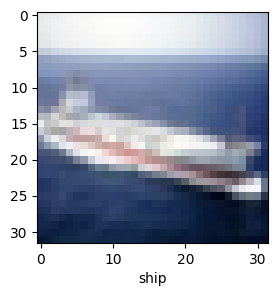

In [27]:
plot_sample(X_test, y_test , 54)

In [30]:
classes[y_pred[54]]


'ship'

In [31]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69      1000
           1       0.74      0.79      0.77      1000
           2       0.71      0.40      0.51      1000
           3       0.54      0.39      0.46      1000
           4       0.62      0.57      0.59      1000
           5       0.65      0.54      0.59      1000
           6       0.78      0.73      0.75      1000
           7       0.66      0.74      0.69      1000
           8       0.73      0.77      0.75      1000
           9       0.54      0.87      0.67      1000

    accuracy                           0.66     10000
   macro avg       0.66      0.66      0.65     10000
weighted avg       0.66      0.66      0.65     10000

